In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *

import CNN

import matplotlib.pyplot as plt
import numpy as np

## CNN

Use a simple convolutional neural network whose architecture is similar to the classical LeNet. 

In [2]:
accuracies = []
mini_batch_size = 100
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

    train_onehot = convert_to_one_hot_labels(train_input,train_target)
    test_onehot = convert_to_one_hot_labels(test_input,test_target)

    # define the model
    model = CNN.CNN() 

    # train model
    for k in range(25):
        CNN.train(model, train_input, train_onehot, mini_batch_size)
    print(f"Baseline Training accuracy is {CNN.accuracy( model(train_input), train_onehot)} ")
    test_accuracy = CNN.accuracy(model(test_input), test_onehot)
    accuracies.append(test_accuracy )
    print(f"Baseline Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.986 
Baseline Test accuracy is 0.76 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.97 
Baseline Test accuracy is 0.752 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 0.996 
Baseline Test accuracy is 0.759 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 0.994 
Baseline Test accuracy is 0.74 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 0.982 
Baseline Test accuracy is 0.727 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.848 
Baseline Test accuracy is 0.727 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 0.728 
Baseline Test accuracy is 0.702 
------------------------------

### Evaluation of model performance

In [3]:
accs = torch.Tensor(accuracies)
print(f"The accuracy of the model is {accs.mean():.4f} ± {accs.var():.4f} ")

The accuracy of the model is 0.7341 ± 0.0026 


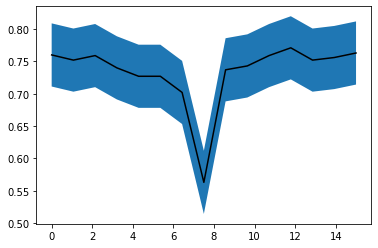

In [4]:
plot_performance(accuracies, 15)